# 2. Small Worlds and Large Worlds

## 2.1 The garden of forking data

### 2.1.1 Counting possibilities

The author's footnote refers to [Cox's theorem](https://en.wikipedia.org/wiki/Cox%27s_theorem); other justifications are given in [Bayesian probability § Justification](https://en.wikipedia.org/wiki/Bayesian_probability#Justification).

As discussed in [Cox's theorem § Interpretation and further discussion](https://en.wikipedia.org/wiki/Cox%27s_theorem#Interpretation_and_further_discussion), there's plenty of reason to doubt this justification.

An arguably better justification is the [Dutch book theorems](https://en.wikipedia.org/wiki/Dutch_book_theorems); see [Dutch Book Arguments (Stanford Encyclopedia of Philosophy)](https://plato.stanford.edu/entries/dutch-book/) and [Notes on the Dutch Book Argument](https://www.stat.berkeley.edu/~freedman/dutchdef.pdf) (by David A Freedman) for some more rigorous mathematics going back to the original person to make the argument (De Finetti). This justification remains completely finite, which seems desirable, not only if you have prior commitments to finitism but based on the following research (quoting from [David A. Freedman](https://en.wikipedia.org/wiki/David_A._Freedman)):

> In particular, the 1965 paper with the innocent title "On the asymptotic behaviour of Bayes estimates in the discrete case II" finds the rather disappointing answer that when sampling from a countably infinite population the [Bayesian procedure](https://en.wikipedia.org/wiki/Bayesian_inference "Bayesian inference") fails almost everywhere, i.e., one does not obtain the true distribution asymptotically. This situation is quite different from the finite case when the (discrete) random variable takes only finite many values and the Bayesian method is consistent in agreement with earlier findings of Doob (1948).

From [Bayesian inference § Alternatives to Bayesian updating](https://en.wikipedia.org/wiki/Bayesian_inference#Alternatives_to_Bayesian_updating):

> [Ian Hacking](https://en.wikipedia.org/wiki/Ian_Hacking "Ian Hacking") noted that traditional "[Dutch book](https://en.wikipedia.org/wiki/Dutch_book "Dutch book")" arguments did not specify Bayesian updating: they left open the possibility that non-Bayesian updating rules could avoid Dutch books. Hacking wrote: "And neither the Dutch book argument nor any other in the personalist arsenal of proofs of the probability axioms entails the dynamic assumption. Not one entails Bayesianism. So the personalist requires the dynamic assumption to be Bayesian. It is true that in consistency a personalist could abandon the Bayesian model of learning from experience. Salt could lose its savour."
>
> Indeed, there are non-Bayesian updating rules that also avoid Dutch books (as discussed in the literature on "[probability kinematics](https://en.wikipedia.org/wiki/Probability_kinematics "Probability kinematics")") following the publication of [Richard C. Jeffrey](https://en.wikipedia.org/wiki/Richard_C._Jeffrey "Richard C. Jeffrey")'s rule, which applies Bayes' rule to the case where the evidence itself is assigned a probability. The additional hypotheses needed to uniquely require Bayesian updating have been deemed to be substantial, complicated, and unsatisfactory.

### 2.1.2 Combining other information

### 2.1.3 From counts to probability

The author uses the term "plausibility" as a synonym for probability; it's not clear why the word is being introduced.

In [1]:
ways <- c(0, 3, 8, 9, 0)
ways / sum(ways)

[1] 0.00 0.15 0.40 0.45 0.00

The following sentence seems to accidentally italicize the word *they* (📌):

> These plausibilities are also *probabilities—they* are ...

## 2.2. Building a model

The three steps the author introduces in this section are almost surely coming directly from his reading of [BDA3](https://stat.columbia.edu/~gelman/book/BDA3.pdf) section **The three steps of Bayesian data analysis**.

### 2.2.1. A data story

### 2.2.2. Bayesian updating

### 2.2.3. Evaluate

## 2.3. Components of the model

### 2.3.1. Variables

### 2.3.2. Definitions

By far the most confusing definition given here is for the likelihood. In this book, a 'likelihood' will refer to a distribution function assigned to an observed variable. In this section, for example, the 'likelihood' is the binomial distribution. According to the author, this is the language used in 'conventional' statistics as well. The author often calls this the 'likelihood' but it is a function, of course, because any probability distribution is a function.

In non-Bayesian statistics and in particular on Wikipedia the definition of the likelihood function is completely different and denoted with $\mathcal{L}$. See the author's footnote and [Likelihood function](https://en.wikipedia.org/wiki/Likelihood_function).

In [2]:
dbinom(6, size = 9, prob = 0.5)

[1] 0.1640625

## 2.4. Making the model go

### 2.4.3 Grid Approximation

In [3]:
p_grid <- seq(from=0, to=1, length.out=20)
p_grid

[1] 0.00000000 0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 [7] 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
[13] 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
[19] 0.94736842 1.00000000

In [4]:
prior <- rep(1, 20)
prior

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

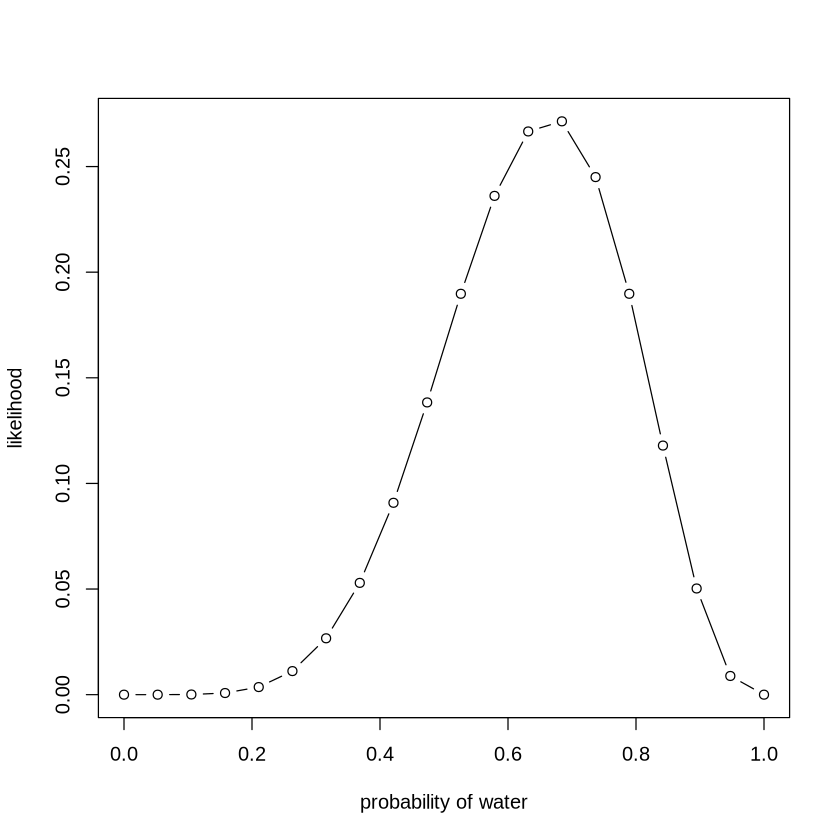

In [5]:
# compute likelihood at each value in grid
likelihood <- dbinom(6, size=9, prob=p_grid)
plot(p_grid, likelihood, type="b", xlab="probability of water", ylab="likelihood")

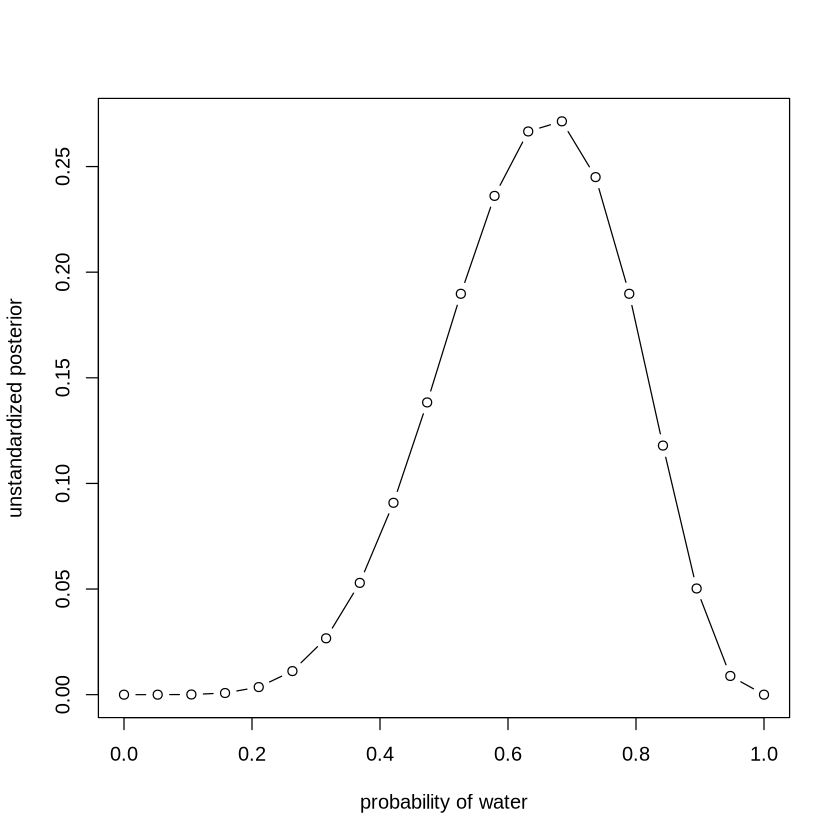

In [6]:
# compute product of likelihood and prior
unstd.posterior <- likelihood * prior
plot(p_grid, unstd.posterior, type="b", xlab="probability of water", ylab="unstandardized posterior")

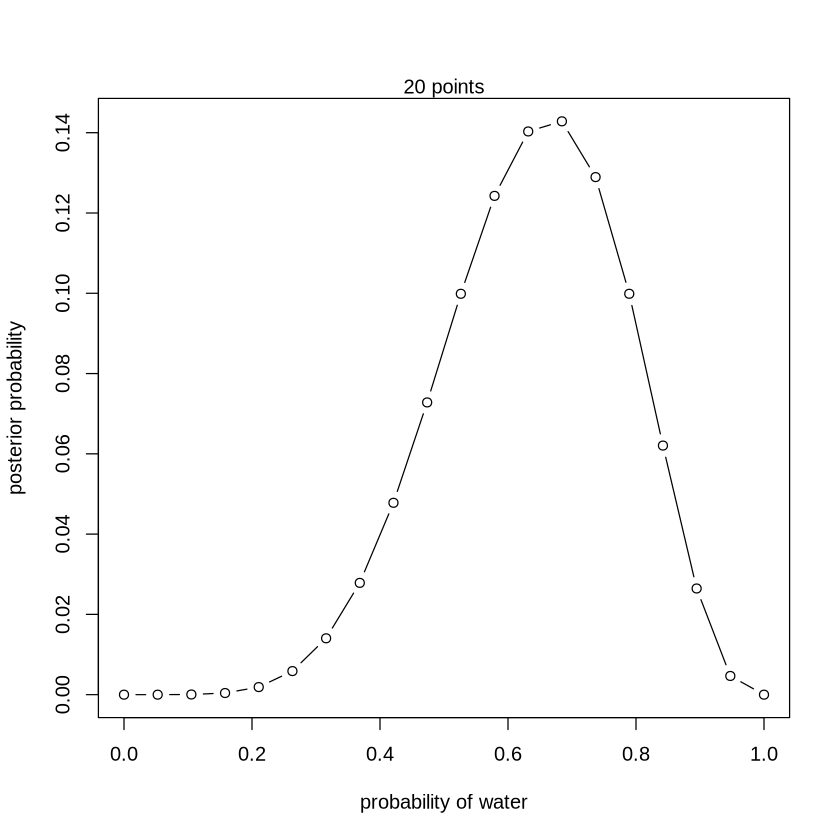

In [7]:
# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum(unstd.posterior)
plot(p_grid, posterior, type="b", xlab="probability of water", ylab="posterior probability")
mtext( "20 points" )

### 2.4.4 Quadratic Approximation

In [8]:
library(rethinking)

Loading required package: rstan

Loading required package: StanHeaders


rstan version 2.32.6 (Stan version 2.32.2)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Loading required package: parallel

rethinking (Version 2.13)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




In [9]:
globe.qa <- quap(
    alist(
        W ~ dbinom(W+L, p), # binomial likelihood
        p ~ dunif(0, 1)     # uniform prior
    ),
    data=list(W=6,L=3) )
precis(globe.qa)

mean      sd        5.5%      94.5%   
p 0.6666669 0.1571337 0.4155369 0.917797

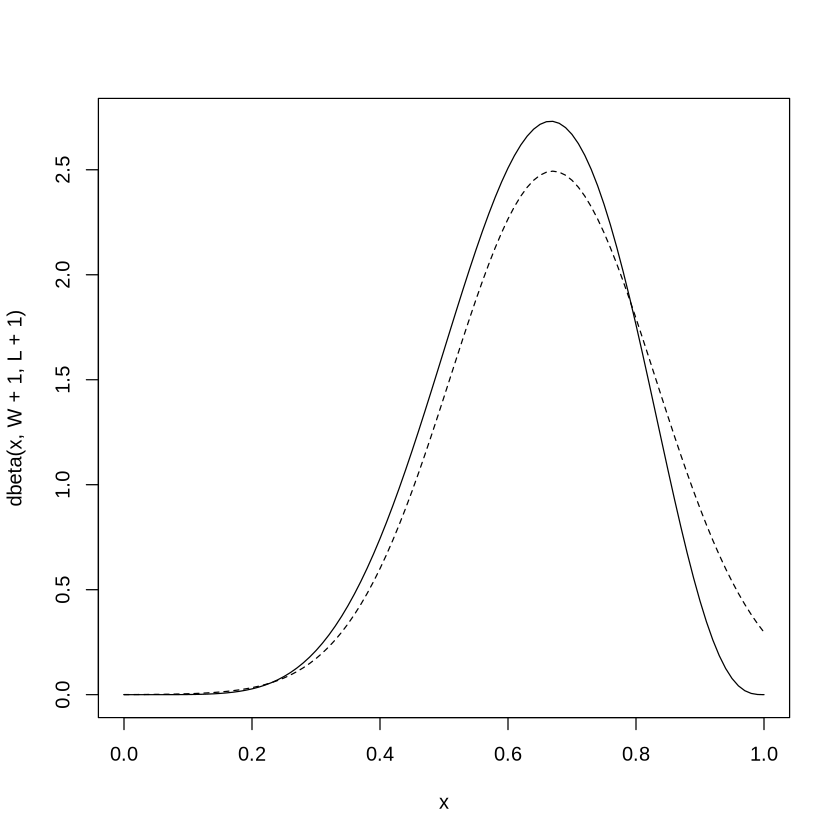

In [10]:
# analytical calculation
W <- 6
L <- 3
curve( dbeta( x , W+1 , L+1 ) , from=0 , to=1 )
# quadratic approximation
curve( dnorm( x , 0.67 , 0.16 ) , lty=2 , add=TRUE )

### 2.4.5 Markov chain Monte Carlo

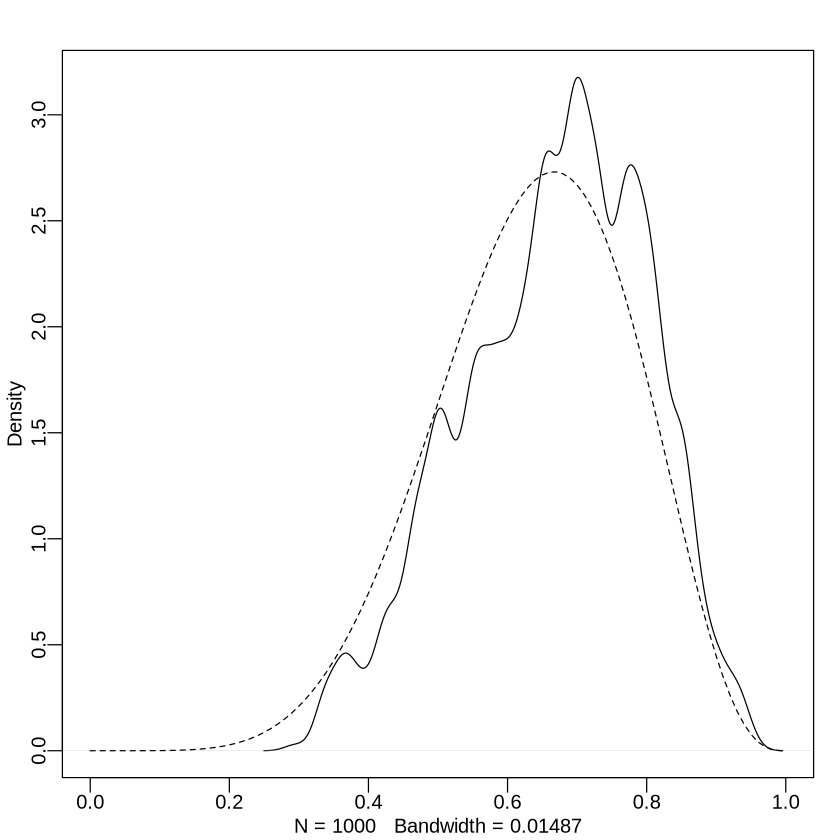

In [11]:
n_samples <- 1000
p <- rep(NA, n_samples)
p[1] <- 0.5
W <- 6
L <- 3
for (i in 2:n_samples) {
    p_new <- rnorm( 1 , p[i-1] , 0.1 )
    if ( p_new < 0 ) p_new <- abs( p_new )
    if ( p_new > 1 ) p_new <- 2 - p_new
    q0 <- dbinom( W , W+L , p[i-1] )
    q1 <- dbinom( W , W+L , p_new )
    p[i] <- ifelse( runif(1) < q1/q0 , p_new , p[i-1] )
}
dens( p , xlim=c(0,1) )
curve( dbeta( x , W+1 , L+1 ) , lty=2 , add=TRUE )